In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

In [2]:
%cd /gdrive/'My Drive'/Dataset/Insurance-Claims-Severity-Prediction/data/

/gdrive/My Drive/Dataset/Insurance-Claims-Severity-Prediction/data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')

test = pd.read_csv('data/test.csv')

In [4]:
print('Train shape:',train.shape)
print('Test shape:',test.shape)

Train shape: (188318, 132)
Test shape: (125546, 131)


In [5]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
def null_percentage(df):
    '''
    input: dataframe
    output: Null percentage of columns in dataframe
    
    '''
    percent = df.isnull().sum()/len(df.index)*100
    df = pd.DataFrame(round(percent,2),columns=['null_percent'])
    
    
    return df[df['null_percent']!=0.00].sort_values('null_percent',ascending=False)

In [7]:
null_percentage(train)

,null_percent


In [8]:
null_percentage(test)

,null_percent


In [9]:
def cat_count(df):
  counts = {}
  cat_cols = df.select_dtypes(include=['object']).columns
  for i in range(len(cat_cols)):
    counts[cat_cols[i]] = len(df[cat_cols[i]].value_counts())
    
  return pd.DataFrame(data=counts.values(), index=counts.keys(),columns=['Categories Counts']).sort_values('Categories Counts',ascending=False)

In [10]:
counts = cat_count(train)
counts

,Categories Counts
cat116,326
cat110,131
cat109,84
cat113,61
cat112,51
cat115,23
cat107,20
cat105,20
cat101,19
cat114,19


In [11]:
print(list(counts.index))

['cat116', 'cat110', 'cat109', 'cat113', 'cat112', 'cat115', 'cat107', 'cat105', 'cat101', 'cat114', 'cat106', 'cat104', 'cat111', 'cat99', 'cat100', 'cat103', 'cat108', 'cat102', 'cat89', 'cat96', 'cat91', 'cat92', 'cat90', 'cat97', 'cat94', 'cat93', 'cat95', 'cat98', 'cat82', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat88', 'cat83', 'cat85', 'cat86', 'cat87', 'cat84', 'cat76', 'cat75', 'cat74', 'cat73', 'cat66', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat71', 'cat67', 'cat68', 'cat69', 'cat70', 'cat72', 'cat2', 'cat60', 'cat1', 'cat58', 'cat29', 'cat27', 'cat26', 'cat25', 'cat24', 'cat23', 'cat22', 'cat21', 'cat20', 'cat19', 'cat18', 'cat17', 'cat16', 'cat15', 'cat14', 'cat13', 'cat12', 'cat11', 'cat10', 'cat9', 'cat8', 'cat7', 'cat6', 'cat5', 'cat4', 'cat3', 'cat28', 'cat30', 'cat57', 'cat31', 'cat56', 'cat55', 'cat54', 'cat53', 'cat52', 'cat51', 'cat50', 'cat49', 'cat48', 'cat47', 'cat46', 'cat45', 'cat44', 'cat43', 'cat42', 'cat41', 'cat40', 'cat39', 'cat38', 'cat37', '

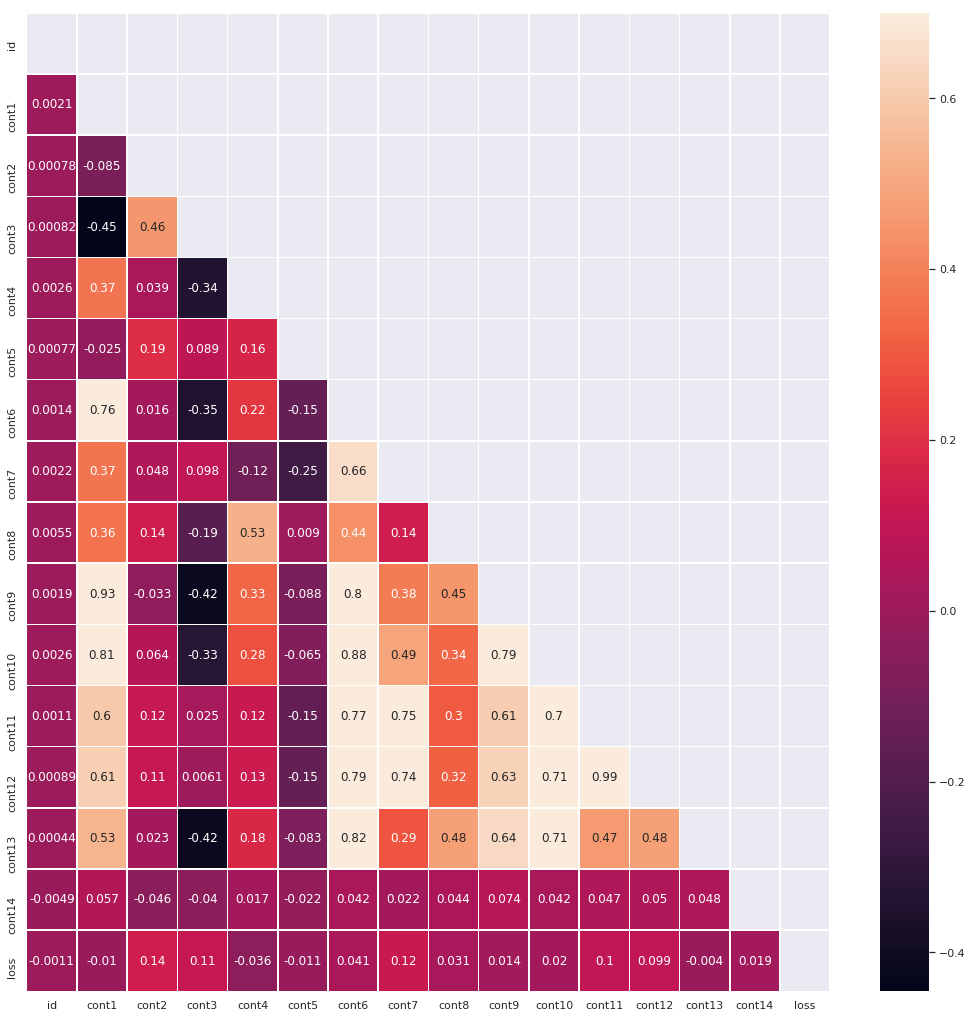

In [12]:
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  
  sns.set(rc={'figure.figsize':(18,18)})
  ax = sns.heatmap(train.corr(), mask=mask, vmax=.7,annot=True,linewidths=0.5)

In [13]:
train.drop(['cont12','cont1','cont6','cont9'],axis=1,inplace=True)
test.drop(['cont12','cont1','cont6','cont9'],axis=1,inplace=True)


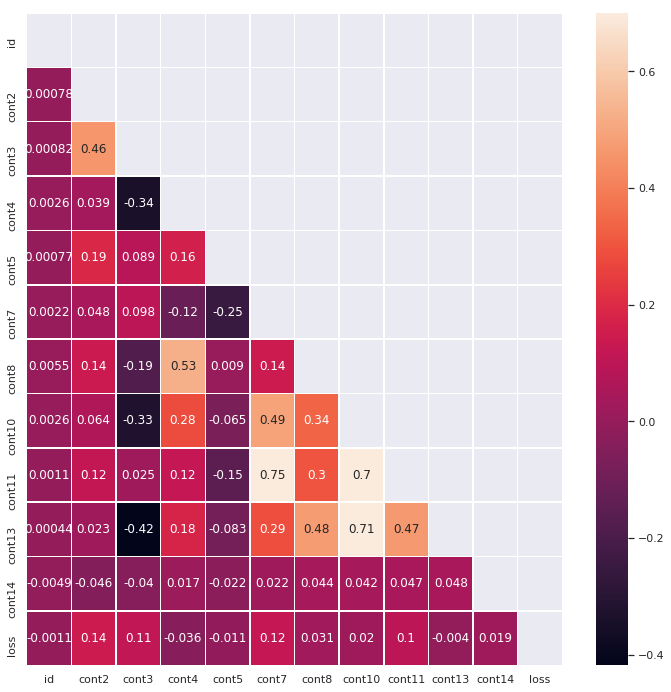

In [14]:
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  
  sns.set(rc={'figure.figsize':(12,12)})
  ax = sns.heatmap(train.corr(), mask=mask, vmax=.7,annot=True,linewidths=0.5)

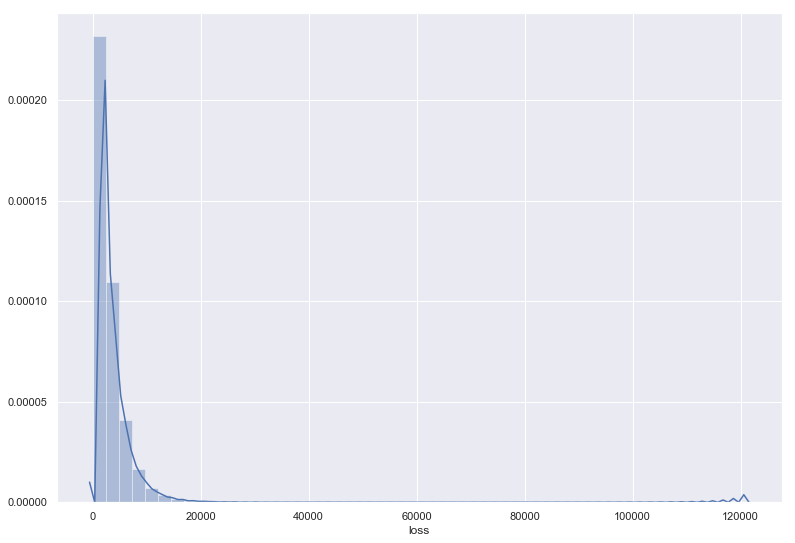

In [15]:
sns.set(rc={'figure.figsize':(13,9)})
sns.distplot(train['loss'])

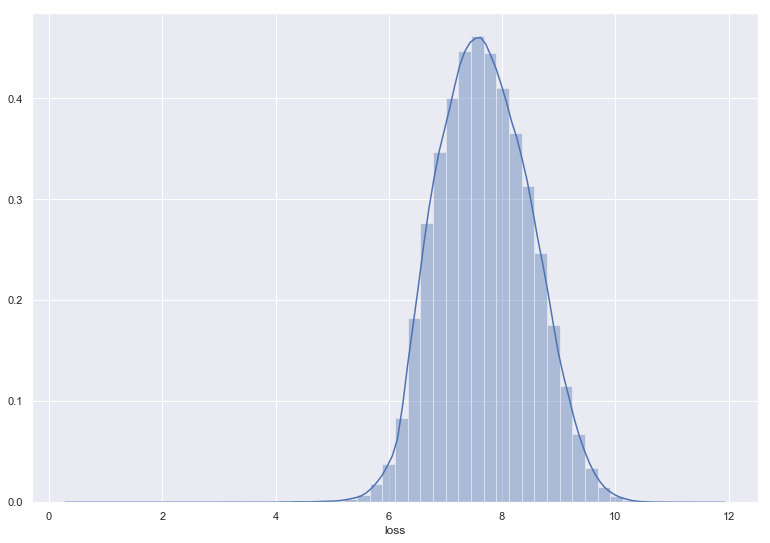

In [16]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train["loss"]))


In [17]:
train.select_dtypes(include=['integer','float']).columns

Index(['id', 'cont2', 'cont3', 'cont4', 'cont5', 'cont7', 'cont8', 'cont10',
       'cont11', 'cont13', 'cont14', 'loss'],
      dtype='object')

In [18]:
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)


In [19]:
num_cols = ['cont2', 'cont3', 'cont4', 'cont5', 'cont7', 'cont8', 'cont10',
       'cont11', 'cont13', 'cont14']

cat_cols = list(counts.index)

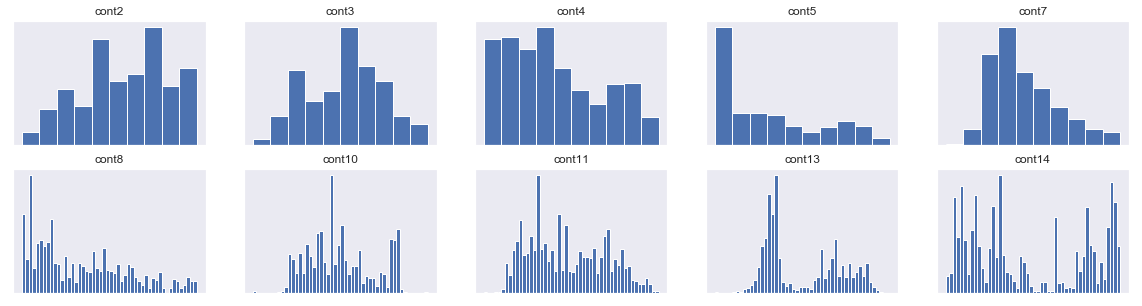

In [20]:
fig = plt.figure(figsize=(20,5))

for i in range(5):
    ax = fig.add_subplot(2, 5, i+1 , xticks=[], yticks=[])
    ax.hist(train[num_cols[i]], bins=10)
    ax.set_title(num_cols[i])

    ax = fig.add_subplot(2, 5, i+6 , xticks=[], yticks=[])
    ax.hist(train[num_cols[i+5]], bins=50)
    ax.set_title(num_cols[i+5])
    

In [21]:
merged = pd.concat([train,test],sort=False)

In [22]:
merged.shape

(313864, 127)

In [23]:
null_percentage(merged)

,null_percent
loss,40.0


In [24]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder


In [25]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,Normalizer


lb = LabelEncoder()

for cat in cat_cols:
  merged[cat] = lb.fit_transform(merged[cat])


In [26]:
merged.tail(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont3,cont4,cont5,cont7,cont8,cont10,cont11,cont13,cont14,loss
125541,0,0,0,1,0,0,0,0,0,0,...,0.654310,0.284048,0.281143,0.815941,0.39455,0.40666,0.550529,0.298734,0.345946,NaN
125542,0,0,0,0,1,1,0,1,0,0,...,0.549770,0.267727,0.674529,0.424968,0.47669,0.26894,0.324486,0.490001,0.290576,NaN
125543,1,1,0,0,1,0,0,0,1,1,...,0.484196,0.594598,0.794794,0.511502,0.72299,0.83510,0.933174,0.848129,0.808125,NaN
125544,0,0,0,0,0,1,0,1,0,0,...,0.484196,0.373816,0.302678,0.388545,0.31796,0.36974,0.307628,0.608259,0.361542,NaN
125545,0,1,0,0,0,0,0,0,1,0,...,0.549770,0.208655,0.413817,0.242044,0.25461,0.25183,0.245410,0.287682,0.220323,NaN


In [27]:
train = merged[merged['loss'].notna()]
test = merged[merged['loss'].isna()]

In [28]:
print(train.shape)
print(test.shape)

(188318, 127)
(125546, 127)


In [29]:
train['loss'] = np.log1p(train['loss'])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler()
train.loc[:,num_cols] = scaler.fit_transform(train.loc[:,num_cols])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont3,cont4,cont5,cont7,cont8,cont10,cont11,cont13,cont14,loss
0,0,1,0,1,0,0,0,0,1,0,...,0.196416,0.788187,0.041163,0.285393,0.088414,0.839313,0.554715,0.832028,0.804541,7.702637
1,0,1,0,0,0,0,0,0,1,1,...,0.626632,0.562422,0.860732,0.394501,0.489681,0.441406,0.314495,0.618460,0.187595,7.158203
2,0,1,0,0,1,0,0,0,1,1,...,0.511420,0.077187,0.165012,0.264420,0.048862,0.326097,0.359217,0.197802,0.894121,8.008396
3,1,1,0,1,0,0,0,0,1,0,...,0.557931,0.253282,0.200881,0.345649,0.109078,0.446914,0.303703,0.612031,0.635849,6.846784
4,0,1,0,1,0,0,0,0,1,1,...,0.557931,0.381130,0.602287,0.191194,0.011785,0.213371,0.175796,0.248701,0.380205,7.924742


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 0 to 188317
Columns: 127 entries, cat1 to loss
dtypes: float64(11), int32(116)
memory usage: 100.6 MB


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['loss'],axis=1), train['loss'], test_size=0.3, random_state=101)

In [142]:
X_train, y_train = train.drop(['loss'],axis=1), train['loss']
X_test = test.drop(['loss'],axis=1)
 

##  Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [35]:
lr.fit(X=X_train,y=y_train)
pred = lr.predict(X_valid)

In [36]:
from sklearn.metrics import mean_squared_error as mse


print('MSE:', round(mse(y_valid, pred),4))


MSE: 0.3398


## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred = DTR.predict(X_valid)

In [38]:
print('MSE:', round(mse(y_valid, pred),4))


MSE: 0.6534


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
pred = RFR.predict(X_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
print('MSE:', round(mse(y_valid, pred),4))


MSE: 0.3479


## XG Boost

In [43]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=500, n_jobs=8,reg-'squarederror')
xgbr.fit(X_train,y_train)
pred = xgbr.predict(X_valid)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:54:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
print('MSE:', round(mse(y_valid, pred),4))

MSE: 0.2957


## Xgboost (With Tuned Parameters)

In [143]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=500, n_jobs=-1,seed =1,
                        colsample_bytree =0.3085,
                        subsample= 0.9930,
                        eta = 0.1,
                        gamma = 0.5290,
                        booster = 'gbtree',    
                        max_depth = 7,
                        min_child_weight = 4.2922,
                        eval_metric='mae')


xgbr.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:15:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3085, eta=0.1,
             eval_metric='mae', gamma=0.529, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=4.2922, missing=None, n_estimators=500, n_jobs=-1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=1, silent=None,
             subsample=0.993, verbosity=1)

In [144]:
pred = xgbr.predict(X_test)

In [140]:
print('MSE:', round(mse(y_valid, pred),4))

MSE: 0.2368


## Lightgbm

In [119]:
import lightgbm

lgbm = lightgbm.LGBMRegressor(n_estimators = 1000, verbose= 1)
lgbm.fit(X_train,y_train)
pred = lgbm.predict(X_valid)



In [120]:
print('MSE:', round(mse(y_valid, pred),4))

MSE: 0.2903


## Lightgbm (With Tuning)

In [90]:
from sklearn.model_selection import RandomizedSearchCV

import lightgbm as lgbm

In [116]:

param_test1 = {#boosting_type='gbdt', 
              'num_leaves':list(range(24,45,6)), 
              'max_depth': list(range(5,9,2)),
              'learning_rate':[0.01,0.06,0.11,0.17], 
              'n_estimators':list(range(250,500,50)),
              #subsample_for_bin=200000, 
              #objective=None, 
              #class_weight=None, 
              'min_split_gain': [0.0,0.02,0.04], 
              #min_child_weight=0.001, 
              ##min_child_samples=20, 
              #subsample=1.0, 
              #subsample_freq=0, 
              #colsample_bytree=1.0, 
              'reg_alpha': [0.0,0.01,0.02], 
              'reg_lambda':[0.0,0.01,0.02], 
              #random_state=None, 
              #n_jobs=-1, 
              #silent=True, 
              #importance_type='split',
}

rscv = RandomizedSearchCV(lgbm.LGBMRegressor(random_state=42,n_jobs=-1),
                        param_distributions=param_test1,
                        scoring = 'neg_mean_squared_error', 
                        n_jobs=-1, 
                        verbose=1,
                        n_iter=100)



In [117]:
rscv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=42,
                                           reg_alpha=0.0, r...
                   param_distributions={'learning_rate': [0.01, 0.06, 0.11,
                                                          0.17],
                                       

In [118]:
gs.best_params_

{'reg_lambda': 0.02,
 'reg_alpha': 0.0,
 'num_leaves': 42,
 'n_estimators': 300,
 'min_split_gain': 0.0,
 'max_depth': 7,
 'learning_rate': 0.06}

In [135]:
import lightgbm

lgbm = lightgbm.LGBMRegressor(reg_lambda= 0.02,
                              reg_alpha = 0.0,
                              num_leaves= 42,
                              n_estimators = 300,
                              min_split_gain = 0.0,
                              max_depth = 7,
                              learning_rate = 0.06,
                              random_state=42,
                              n_jobs=-1)
lgbm.fit(X_train,y_train)




LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.06, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=300, n_jobs=-1, num_leaves=42, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.02, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [136]:
pred = lgbm.predict(X_test)

In [122]:
print('MSE:', round(mse(y_valid, pred),4))

MSE: 0.2897


## MLP

In [124]:
import keras
from keras.models import Sequential
from keras import layers,optimizers,activations,regularizers,metrics,losses
from keras.layers import Flatten,Dense,Dropout

Using TensorFlow backend.


In [125]:

model = Sequential()


model.add(Dense(units=512, activation='relu', input_dim=X_train.shape[1]))

model.add(Dropout(0.5))

model.add(Dense(units=256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1))


opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)


model.compile(loss='mse', optimizer=opt, metrics=['mse']) 


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               65024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
__________

In [127]:


# Train neural network
history = model.fit(X_train, 
            y_train,
            epochs=100,
            verbose=1,
            batch_size=256, 
            validation_data=(X_valid,y_valid))



Instructions for updating:
Use tf.cast instead.
Train on 131822 samples, validate on 56496 samples
Epoch 1/100
131822/131822 [==============================] - 9s 71us/step - loss: 28.8001 - mean_squared_error: 28.8001 - val_loss: 2.3061 - val_mean_squared_error: 2.3061
Epoch 2/100
131822/131822 [==============================] - 3s 19us/step - loss: 2.7901 - mean_squared_error: 2.7901 - val_loss: 1.1914 - val_mean_squared_error: 1.1914
Epoch 3/100
131822/131822 [==============================] - 3s 19us/step - loss: 2.1479 - mean_squared_error: 2.1479 - val_loss: 1.0102 - val_mean_squared_error: 1.0102
Epoch 4/100
131822/131822 [==============================] - 3s 19us/step - loss: 1.7230 - mean_squared_error: 1.7230 - val_loss: 0.8719 - val_mean_squared_error: 0.8719
Epoch 5/100
131822/131822 [==============================] - 3s 19us/step - loss: 1.3585 - mean_squared_error: 1.3585 - val_loss: 0.8692 - val_mean_squared_error: 0.8692
Epoch 6/100
131822/131822 [======================

Epoch 95/100
131822/131822 [==============================] - 3s 20us/step - loss: 0.6585 - mean_squared_error: 0.6585 - val_loss: 0.6580 - val_mean_squared_error: 0.6580
Epoch 96/100
131822/131822 [==============================] - 3s 20us/step - loss: 0.6586 - mean_squared_error: 0.6586 - val_loss: 0.6580 - val_mean_squared_error: 0.6580
Epoch 97/100
131822/131822 [==============================] - 3s 21us/step - loss: 0.6586 - mean_squared_error: 0.6586 - val_loss: 0.6583 - val_mean_squared_error: 0.6583
Epoch 98/100
131822/131822 [==============================] - 3s 20us/step - loss: 0.6585 - mean_squared_error: 0.6585 - val_loss: 0.6590 - val_mean_squared_error: 0.6590
Epoch 99/100
131822/131822 [==============================] - 3s 20us/step - loss: 0.6586 - mean_squared_error: 0.6586 - val_loss: 0.6581 - val_mean_squared_error: 0.6581
Epoch 100/100
131822/131822 [==============================] - 3s 21us/step - loss: 0.6586 - mean_squared_error: 0.6586 - val_loss: 0.6581 - val_

In [128]:
pred = model.predict(X_valid)
print('MSE:', round(mse(y_valid, pred),4))

MSE: 0.6581


## Submission

In [145]:
submission = pd.read_csv('data/sample_submission.csv',index_col='id')
submission['loss'] = np.expm1(pred)
submission.to_csv('XGB_Tuning_Final.csv')
